# Grafy distribúcie dát

V tejto kapitole sa oboznámime s viacerými grafmi, ktoré nám umožňujú vizualizovať distribúciu dát v dátovej množine. Postupne si predstavíme:

* distplot
* jointplot
* pairplot
* rugplot
* kdeplot

___
## Import knižníc

In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline

## Import údajov
Seaborn obsahuje predpripravené dátové sady. Aktuálny prehľad dostupných dátových sád získame pomocou sns.get_dataset_names().

* anscombe
* attention
* brain_networks
* car_crashes
* diamonds
* dots
* exercise
* flights
* fmri
* gammas
* iris
* mpg
* planets
* tips
* titanic

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [4]:
tips.describe()

total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000

In [5]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 6.8 KB


## distplot

Tento graf zobrazuje distrubúciu jednorozmernej množiny pozorovaní. Chybové hlásenie je podmienené aktuálnou verziu knižnice.

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


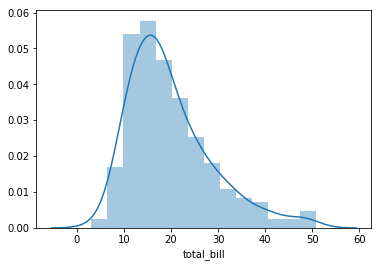

In [12]:
sns.distplot(tips['total_bill'])
# Safe to ignore warnings

Ak nechceme zobraziť KDE (kernel density estimattion), nastavíme parameter *kde* na False. Parameter *bins* určuje, do koľkých skupín sa údaje na x-ovej osi rozdelia. 

In [13]:
sns.distplot(tips['total_bill'],kde=False,bins=25)

Opačne, ak nechceme vidieť histogram, ale len KDE, prípadne grafické znázornenie hustoty rozloženia jednotlivých dát jednorozmerného poľa, použijeme nasledujúce parametre.

In [14]:
sns.distplot(tips['total_bill'],rug=True, hist=False, color='orange')

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


## jointplot

jointplot() nám umožňuje prepojiť dva grafy typu distplots pre zobrazenie dvojrozmerných dát. Voľbou parametra *kind* môžeme zmeniť vzhľad grafu: 
* “scatter” - rozptyl
* “reg” - regresia
* “resid” - reziduá
* “kde” - odhad distribúcie 
* “hex” - hexagonálne zobrazenie

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


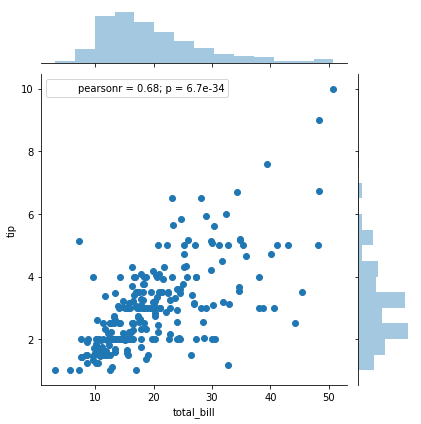

In [15]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter')

In [16]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex', color='g')

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


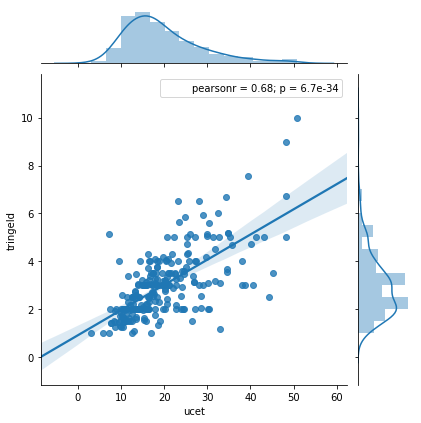

In [17]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg').set_axis_labels("ucet", "tringeld")

Rovnako môžeme zobraziť hustotu, kde sa najviac hodnôt skúmaného atribútu nachádza.

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


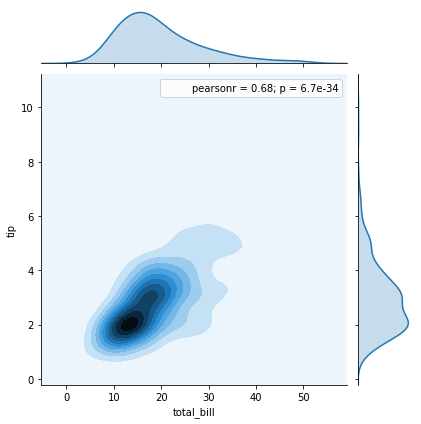

In [18]:
sns.jointplot(x='total_bill', y='tip',data=tips,kind='kde')

## pairplot

Ďalší typ grafu, **pairplot** nám umožní zobraziť vzťahy medzi jednotlivými atribútmi dátového rámca, ktoré obsahujú číselné hodnoty. Zároveň môžeme graf prispôsobiť našim predstavám pomocou viacerých zaujímavých parametrov. 

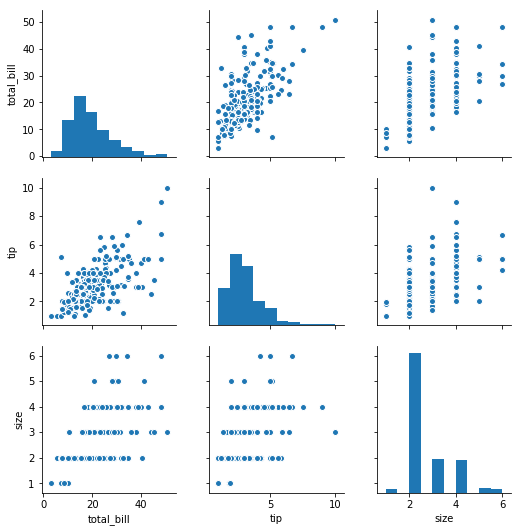

In [19]:
sns.pairplot(tips)

Napríklad, môžeme pridať kategorickú premennú pomocou parametra *hue* a porovnať tak dáta podľa ďalšieho kritéria. Ak chceme zmeniť farebnú paletu, môžeme si vybrať niektrú z preddefinovaných.

In [20]:
sns.palplot(sns.color_palette())

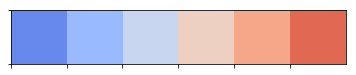

In [21]:
sns.palplot(sns.color_palette('coolwarm'))

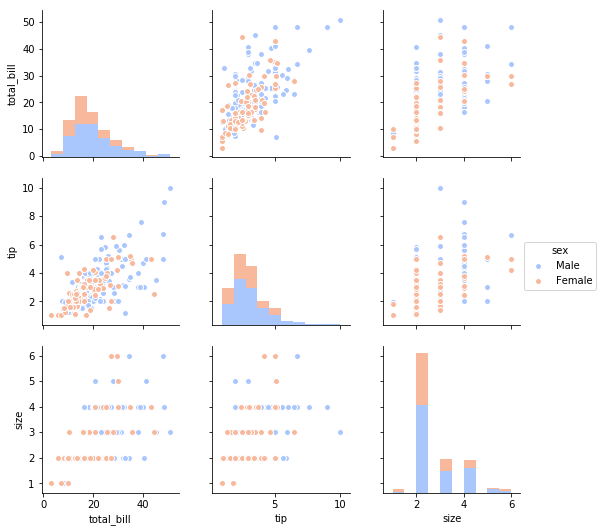

In [22]:
sns.pairplot(tips,hue='sex',palette='coolwarm')

## rugplot

Graf typu **rugplots** umožňuje vykreliť rôzne hustú čiaru zodpovedajúcu jendotlivým bodom distribúcie jednorozmerných dát. 

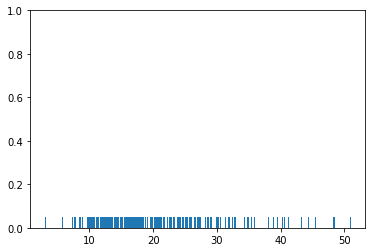

In [23]:
sns.rugplot(tips['total_bill'])